$\large\textbf{Question 2: (Bayesian inference ) }$

$\large\textbf{2.}$ Generate 1000  samples from a normal distribution with mean $\mu$ = 10 and standard deviation $\sigma$ = 3 . plot the histogram.

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [89]:
np.random.seed(1000)

In [90]:
Norm_D = np.random.normal(10, 3, 1000)

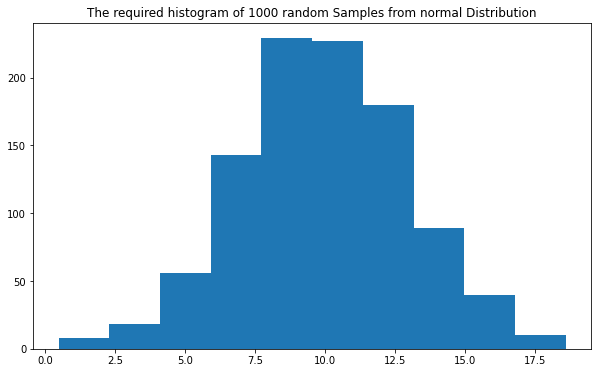

In [91]:
plt.figure(figsize=(10,6))
plt.hist(Norm_D)
plt.title('The required histogram of 1000 random Samples from normal Distribution')
plt.show()

$\large\textbf{3.} Ans : $

In [92]:
def Prior(theta):
  if theta[1] > 0:
    return 1
  else:
    return 0

$\large\textbf{4.} Ans : $

In [93]:
def Transition_Model(theta):
  return [theta[0], np.random.normal(theta[1],1)]

$\large\textbf{5.} Ans : $

In [94]:
def Log_likelihood(theta,D):
  assert type(D) is np.ndarray
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))

$\large\textbf{Que:}$ Explain why taking logarithm is helphul.


$\large\textbf{Ans:}$   It is more convenient to maximize the log of the likelihood function. Because the logarithm is monotonically increasing function of its argument, maximization of the log of a function is equivalent to maximization of the function itself. 

$\large\textbf{6.} Ans : $

In [95]:
# theta_new = (mu,sigma_new)
# theta_current = (mu,sigma_current)
def Acceptance(theta_current, theta_new):
  if theta_new > theta_current:
    return True
  else:
    accept = np.random.uniform(0,1)
    if accept < np.exp(theta_new - theta_current):
      return True
    else:
      return False

$\large\textbf{7.} Ans : $

In [96]:
def Metropolis_Algorithm(Log_likelihood,Prior, Transition_Model,Initial_state, Number_iter, Norm_D, Acceptance):
  theta = Initial_state
  Accepted_sigma = []
  Rejected_sigma = []   
  A = []
  R = []
  for i in range(Number_iter):
    theta_new = Transition_Model(theta)
    theta_lik = Log_likelihood(theta, Norm_D)
    theta_new_lik = Log_likelihood(theta_new, Norm_D) 
    if Acceptance(theta_lik + np.log(Prior(theta)), theta_new_lik + np.log(Prior(theta_new))) == True:            
      theta = theta_new
      Accepted_sigma.append(theta_new)
      A.append(i)
    else:
      Rejected_sigma.append(theta_new) 
      R.append(i)          
  return np.array(Accepted_sigma), np.array(Rejected_sigma), np.array(A), np.array(R)

Plot for First 200 Iterations :


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


[]

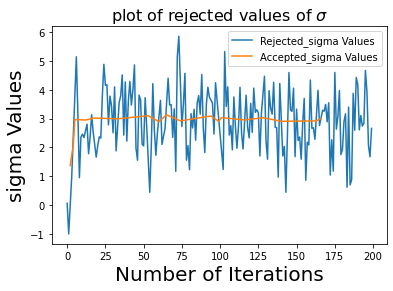

In [97]:
Accepted_sigma, Rejected_sigma, A, R = Metropolis_Algorithm(Log_likelihood,Prior , Transition_Model,[10,0.1], 200, Norm_D, Acceptance)
print('Plot for First 200 Iterations :')
plt.plot(R, Rejected_sigma[:,1], label = 'Rejected_sigma Values')
plt.legend()
plt.plot(A, Accepted_sigma[:,1], label = 'Accepted_sigma Values')
plt.legend()
plt.title('plot of rejected values of $\sigma$',fontsize = 16)
plt.xlabel('Number of Iterations',fontsize = 20)
plt.ylabel('sigma Values',fontsize = 20)
plt.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


For All 25000 Iterations :


[]

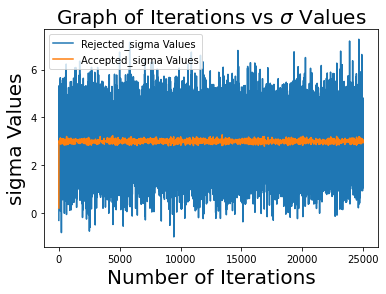

In [98]:
Accepted_sigma, Rejected_sigma, A, R = Metropolis_Algorithm(Log_likelihood,Prior , Transition_Model,[10,0.1], 25000, Norm_D, Acceptance)
print('For All 25000 Iterations :')
plt.plot(R, Rejected_sigma[:,1], label = 'Rejected_sigma Values')
plt.legend()
plt.plot(A, Accepted_sigma[:,1], label = 'Accepted_sigma Values')
plt.legend()
plt.title('Graph of Iterations vs $\sigma$ Values',fontsize =20)
plt.xlabel('Number of Iterations',fontsize = 20)
plt.ylabel('sigma Values',fontsize = 20)
plt.plot()

$\large\textbf{8.} Ans : $

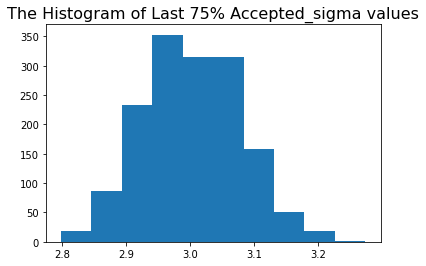

In [99]:
Accepted_sigma_1 = Accepted_sigma[:,1][int(0.25*len(Accepted_sigma[:,1]))::]
plt.hist(Accepted_sigma_1)
plt.title('The Histogram of Last 75% Accepted_sigma values',fontsize = 16)
plt.show()

$\large\textbf{comment:}$ \\
  when we dropping few starting values of sigma ($\sigma$) then we get the distribution of this accepted region of sigma ( $\sigma$) looking exactly like the normal distribution. which is very useful for us. hence dropping few sigma ($\sigma$) is very much useful for us.

$\large\textbf{9.} Ans : $

In [100]:
def Prior(theta):
  if theta[1] > 0:
    if 5 <= theta[0] <= 15:
      return 1/10
    else:
      return 0
  else:
    return 0

In [101]:
def Transition_Model(theta):
  return np.random.multivariate_normal(theta, np.identity(2))

In [102]:
def Log_likelihood(theta,D):
  assert type(D) is np.ndarray
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))

In [103]:
def Acceptance(theta_current, theta_new):
  if theta_new > theta_current:
    return True
  else:
    accept = np.random.uniform(0,1)
    if accept < np.exp(theta_new - theta_current):
      return True
    else:
      return False

In [104]:
def Metropolis_Algorithm(Log_likelihood,Prior, Transition_Model,Initial_state, Number_iter, Norm_D, Acceptance):
  theta = Initial_state
  Accepted_sigma = []
  Rejected_sigma = []   
  A = []
  R = []
  for i in range(Number_iter):
    theta_new = Transition_Model(theta)
    theta_lik = Log_likelihood(theta, Norm_D)
    theta_new_lik = Log_likelihood(theta_new, Norm_D) 
    if Acceptance(theta_lik + np.log(Prior(theta)), theta_new_lik + np.log(Prior(theta_new))) == True:            
      theta = theta_new
      Accepted_sigma.append(theta_new)
      A.append(i)
    else:
      Rejected_sigma.append(theta_new) 
      R.append(i)          
  return np.array(Accepted_sigma), np.array(Rejected_sigma), np.array(A), np.array(R)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


For All  25000 Iterations :


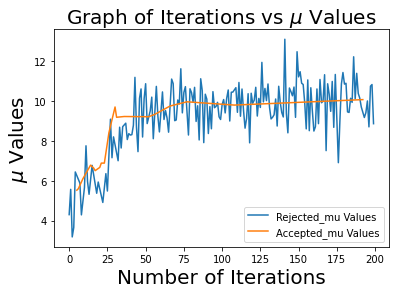

In [105]:
Accepted_sigma, Rejected_sigma, A, R = Metropolis_Algorithm(Log_likelihood,Prior , Transition_Model,[5,0.1], 200, Norm_D, Acceptance)
print('For All  25000 Iterations :')
plt.plot(R, Rejected_sigma[:,0], label = 'Rejected_mu Values')
plt.legend()
plt.plot(A, Accepted_sigma[:,0], label = 'Accepted_mu Values')
plt.legend()
plt.title('Graph of Iterations vs $\mu$ Values', fontsize=20)
plt.xlabel('Number of Iterations',  fontsize=20)
plt.ylabel('$\mu$ Values',  fontsize=20)
plt.show()


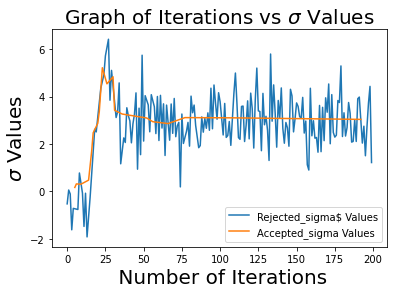

In [106]:
plt.plot(R, Rejected_sigma[:,1], label = 'Rejected_sigma$ Values')
plt.legend()
plt.plot(A, Accepted_sigma[:,1], label = 'Accepted_sigma Values')
plt.legend()
plt.title('Graph of Iterations vs $\sigma$ Values', fontsize= 20)
plt.xlabel(' Number of Iterations', fontsize=20)
plt.ylabel('$\sigma$ Values', fontsize=20)
plt.show()

$\large\textbf{10.} Ans : $

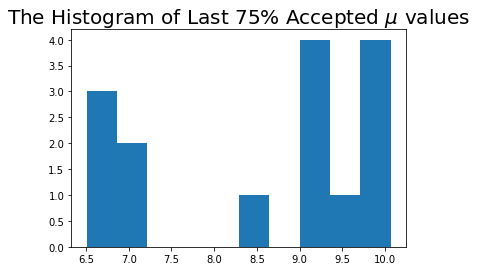

In [107]:
Accepted_mu_1 = Accepted_sigma[:,0][int(0.25*len(Accepted_sigma[:,0]))::]
plt.hist(Accepted_mu_1)
plt.title('The Histogram of Last 75% Accepted $\mu$ values', fontsize= 20)
plt.show()


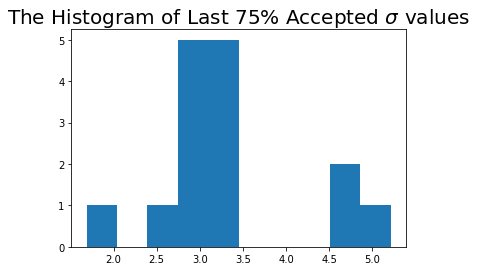

In [108]:
Accepted_sigma_1 = Accepted_sigma[:,1][int(0.25*len(Accepted_sigma[:,1]))::]
plt.hist(Accepted_sigma_1)
plt.title('The Histogram of Last 75% Accepted $\sigma$ values',  fontsize=20)
plt.show()